# Implementação do método de Runge-Kutta de 4a ordem para a Hamiltoniana

A equação de Duffin, $\ddot {x} + ax + bx^3 = 0$ é uma equação diferencial de segunda ordem. Para aplicar o método de Runge-Kutta, necessitamos convertê-la em um sistema de duas equações diferenciais de primeira ordem.

Sejam,
- $y_1 = x$
- $y_2 = \dot {x} = \dot {y_1}$

Então,
- $y_1 = y_2$ e,
- $y_2 = -ay_1 - by_1^3$

Ficando o sistema de EDO de primeira ordem iguais a:
$$\left\{ \begin{array}{l}
\dot {y_1} = f_1(t, y_1, y_2) = y_2 \\
\dot {y_2} = f_2(t, y_1, y_2) = -ay_1 -by_1^3
\displaystyle \displaystyle \end{array} \right.$$

Onde $f_1 \mbox{ e } f_2$ são as funções que definem as derivadas em relação ao tempo.

## Algoritmo de Runge-Kutta de Quarta Ordem (RK4)
Trata-se de um algoritmo iterativo que empregra a média ponderadas de quatro estimativas de inclinação para calcular o próximo ponto. No caso em questão ficaríamos com:

Tomando como condições iniciais $(t_n, y_1,n, y_2,n)$ e um tamanho de passo *h*, o próximo ponto $(t_{n+1}, y_{1,n+1}, y_{2,n+1})$ teríamos para $t_{n+1} = t_n + h$ as seguintes expressões:



Para $y_1:$

- $k_{1,1} = h \cdot f_1(t_n, y_{1,n}, y_{2,n}) = h \cdot y_{2,n}$
- $k_{2,1} = h \cdot f_1(t_n + h/2, y_{1,n} + k_{1,1}/2, y_{2,n} + k_{1,2}/2) = h \cdot (y_{2,n}+k_{1,2}/2)$
- $k_{3,1} = h \cdot f_1(t_n + h/2, y_{1,n} + k_{2,1}/2, y_{2,n} + k_{2,2}/2) = h \cdot (y_{2,n}+k_{2,2}/2)$
- $k_{4,1} = h \cdot f_1(t_n + h, y_{1,n} + k_{3,1}, y_{2,n} + k_{3,2}) = h \cdot (y_{2,n}+k_{3,2})$
- $y_{1, n+1} = y_{1,n} + \frac{1}{6}(k_{1,1} + 2k_{2,1} + 2k_{3,1} + k_{4,1})$

Para y_2:

- $k_{1,2} = h \cdot f_2(t_n, y_{1,n}, k_{2,n}) = h \cdot (-ay_{1,n} - by_{1,n}^3)$
- $k_{2,2} = h \cdot f_2(t_n + h/2, y_{1,n} + k_{1,1}/2, y_{2,n} + k_{1,2}/2) = h \cdot (-a(y_{1,n} + k_{1,1}/2) - b(y_{1,n} + k_{1,1}/2)^3)$
- $k_{3,2} = h \cdot f_2(t_n + h/2, y_{1,n} + k_{2,1}/2, y_{2,n} + k_{2,2}/2) = h \cdot (-a(y_{1,n} + k_{2,1}/2) - b(y_{1,n} + k_{2,1}/2)^3)$
- $k_{4,2} = h \cdot f_2(t_n + h, y_{1,n} + k_{3,1}, y_{2,n} + k_{3,2}) = h \cdot (-a(y_{1,n} + k_{3,1}) - b(y_{1,n} + k_{3,1})^3)$
- $k_{2,n+1} = y_{2,n} + \frac{1}{6}(k_{1,2} + 2k_{2,2} + 2k_{3,2} + k_{4,2})$

## Implementação em Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definindo as funções do sistema de EDOs de primeira ordem
def model(y, t, a, b):
    y1, y2 = y
    dy1dt = y2
    dy2dt = -a * y1 - b * y1**3
    return np.array([dy1dt, dy2dt])

In [3]:
# Implementação do algoritmo de Runge-Kutta de Quarta Ordem (RK4)
def rk4(func, y0, t, a, b):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(n - 1):
        k1 = func(y[i], t[i], a, b)
        k2 = func(y[i] + 0.5 * h * k1, t[i] + 0.5 * h, a, b)
        k3 = func(y[i] + 0.5 * h * k2, t[i] + 0.5 * h, a, b)
        k4 = func(y[i] + h * k3, t[i] + h, a, b)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [4]:
# Configurações da simulação
initial_conditions = [(1.5, 0), (-2.0, 0), (0.5, 0), (1.0, 1.0)] # Variações de condições iniciais para ilustrar diferentes trajetórias
t_span = np.linspace(0, 20, 1000) # Intervalo de tempo de 0 a 20 com 1000 passos

In [5]:
# Variações dos parâmetros a e b
parameter_variations = {
    'a=1, b=1': (1, 1),
    'a=-1, b=1': (-1, 1),
    'a=1, b=-1': (1, -1),
    'a=-1, b=-1': (-1, -1)
}

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_4987/3663985250.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_values, x_dot_values, label=f'CI: x(0)={y0[0]}, $\dot{{x}}$(0)={y0[1]}')
/tmp/ipykernel_4987/3663985250.py:15: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')


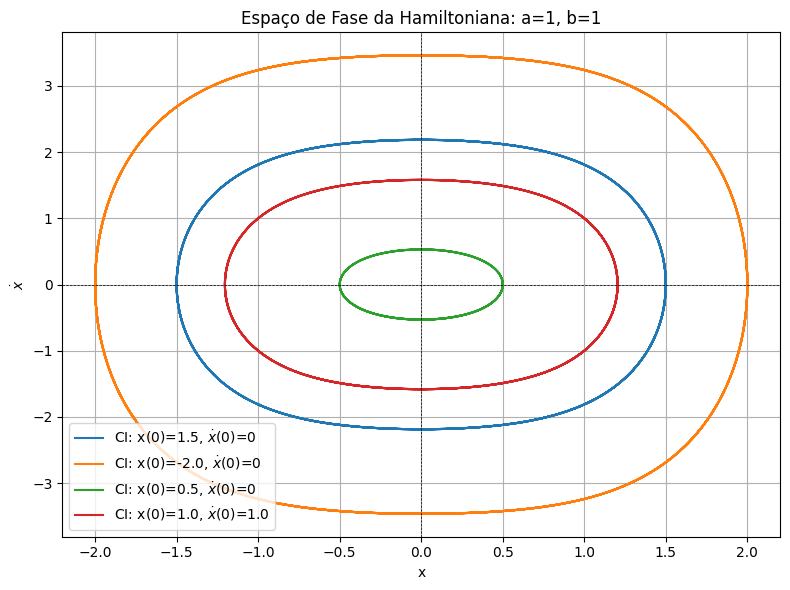

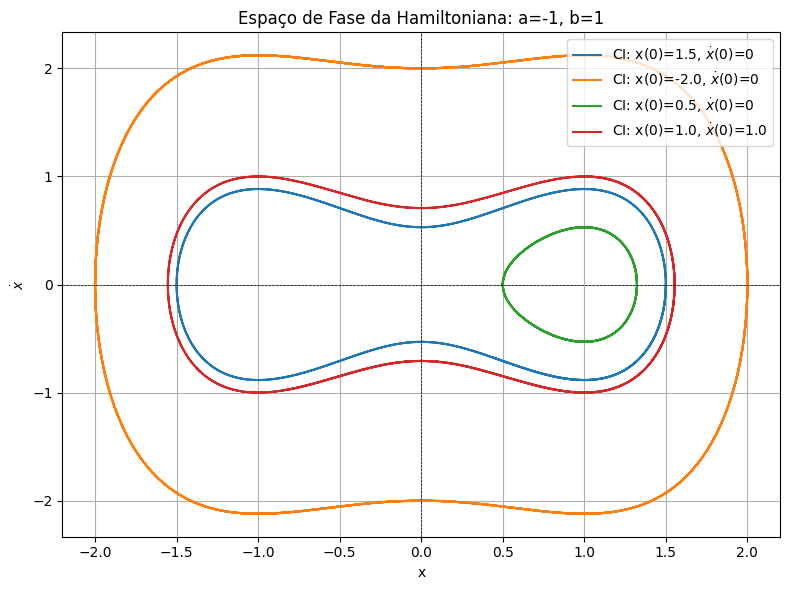

/tmp/ipykernel_4987/2371786251.py:5: RuntimeWarning: overflow encountered in scalar power
  dy2dt = -a * y1 - b * y1**3
/tmp/ipykernel_4987/2371786251.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  dy2dt = -a * y1 - b * y1**3


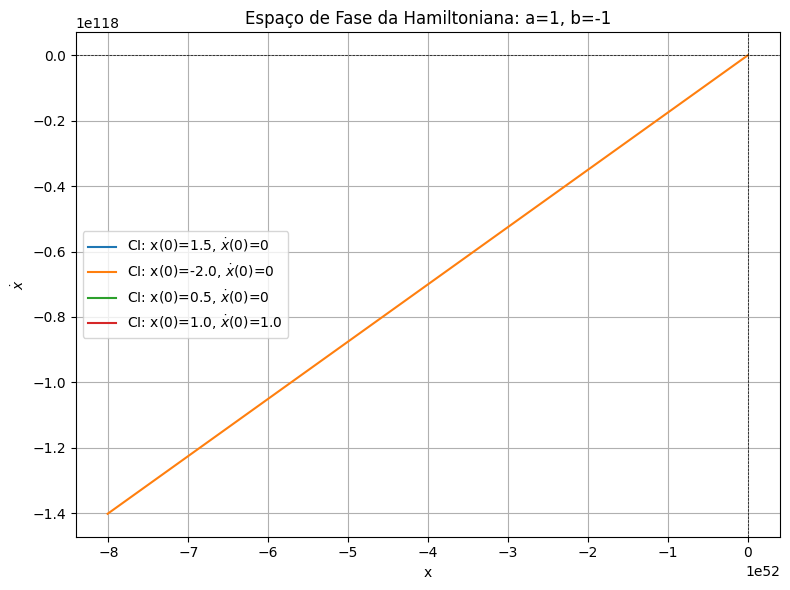

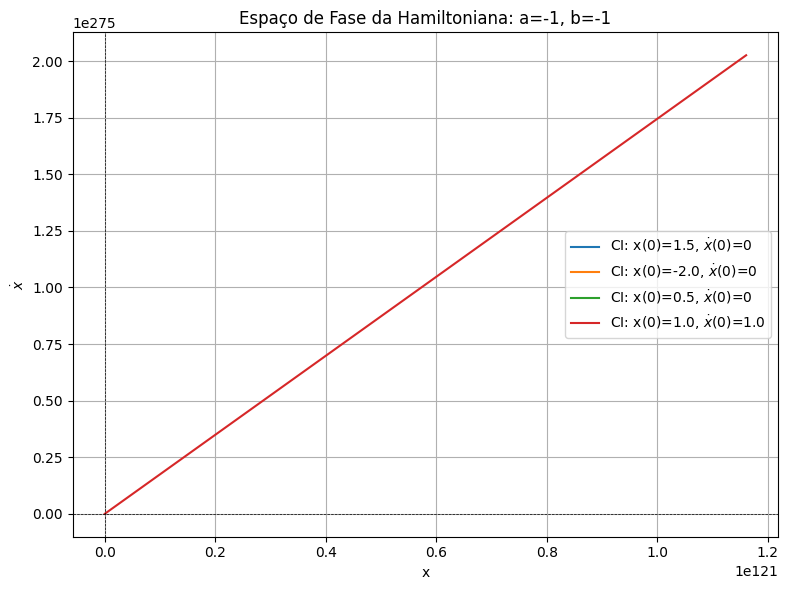

In [6]:
# Geração dos gráficos
for title, (a, b) in parameter_variations.items():
    plt.figure(figsize=(8, 6))
    
    for y0 in initial_conditions:
        solution = rk4(model, y0, t_span, a, b)
        x_values = solution[:, 0]
        x_dot_values = solution[:, 1]
        
        # Plota a trajetória no espaço de fase
        plt.plot(x_values, x_dot_values, label=f'CI: x(0)={y0[0]}, $\dot{{x}}$(0)={y0[1]}')
    
    plt.title(f'Espaço de Fase da Hamiltoniana: {title}')
    plt.xlabel('x')
    plt.ylabel('$\dot{x}$')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Tentando corrigir o erro em a = 1, b= -1 e a = -1 e b= -1

In [7]:
# Implementação do algoritmo de Runge-Kutta de Quarta Ordem (RK4)
def rk4(func, y0, t, a, b):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    # Define um limite de segurança para a amplitude da solução
    limit = 100.0

    for i in range(n - 1):
        # Verifica se o sistema está divergindo
        if np.linalg.norm(y[i]) > limit:
            # Interrompe a simulação e preenche o restante da matriz com NaN
            y[i+1:] = np.nan
            break

        k1 = func(y[i], t[i], a, b)
        k2 = func(y[i] + 0.5 * h * k1, t[i] + 0.5 * h, a, b)
        k3 = func(y[i] + 0.5 * h * k2, t[i] + 0.5 * h, a, b)
        k4 = func(y[i] + h * k3, t[i] + h, a, b)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [8]:
# Configurações da simulação
initial_conditions = [(1.5, 0), (-2.0, 0), (0.5, 0), (1.0, 1.0)] # Variações de condições iniciais para ilustrar diferentes trajetórias
t_span = np.linspace(0, 20, 1000) # Intervalo de tempo de 0 a 20 com 1000 passos

In [9]:
# Variações dos parâmetros a e b
parameter_variations = {
    'a=1, b=1': (1, 1),
    'a=-1, b=1': (-1, 1),
    'a=1, b=-1': (1, -1),
    'a=-1, b=-1': (-1, -1)
}

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_4987/1910208181.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_values, x_dot_values, label=f'CI: x(0)={y0[0]}, $\dot{{x}}$(0)={y0[1]}')
/tmp/ipykernel_4987/1910208181.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')


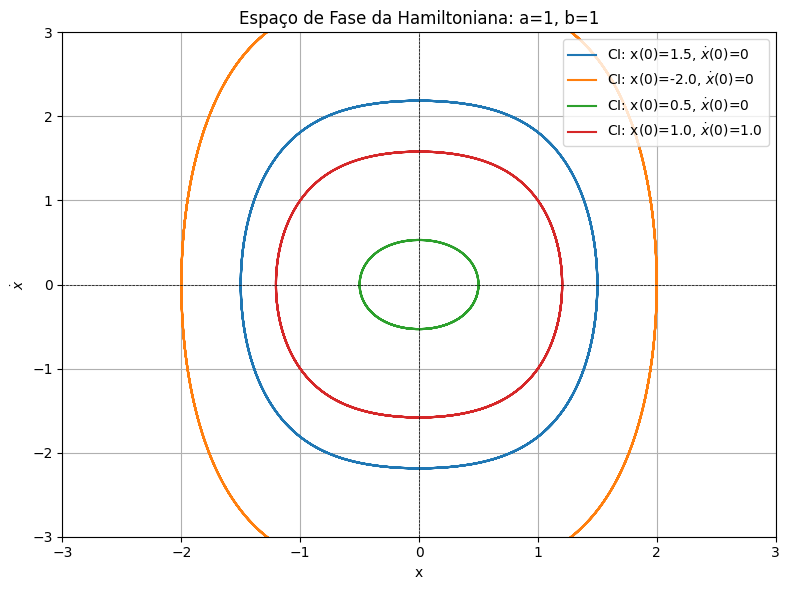

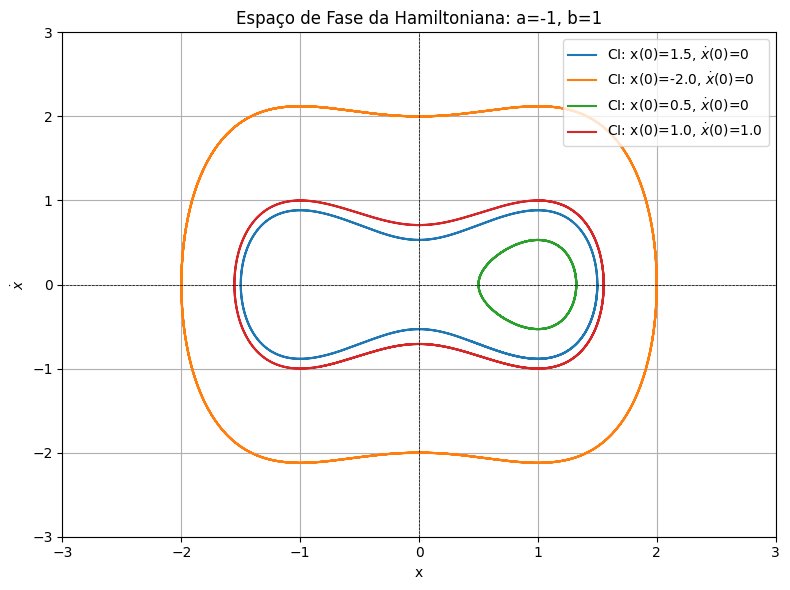

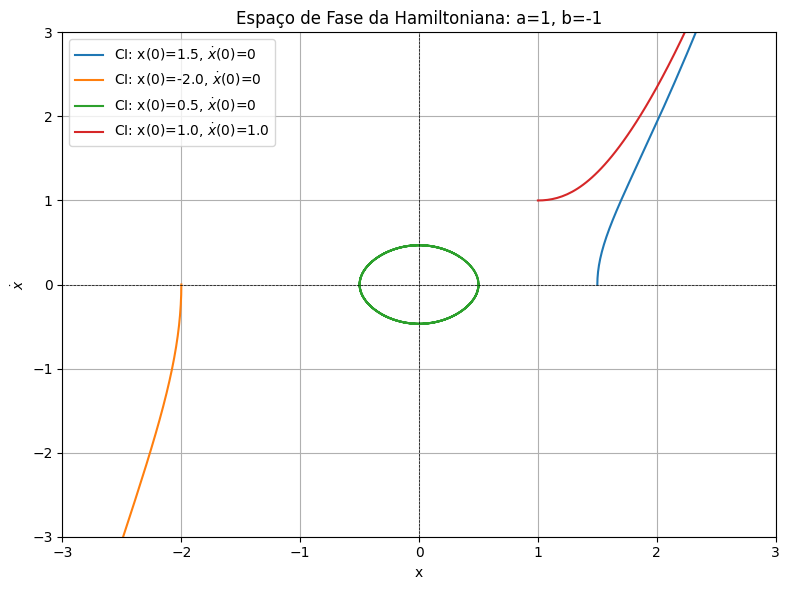

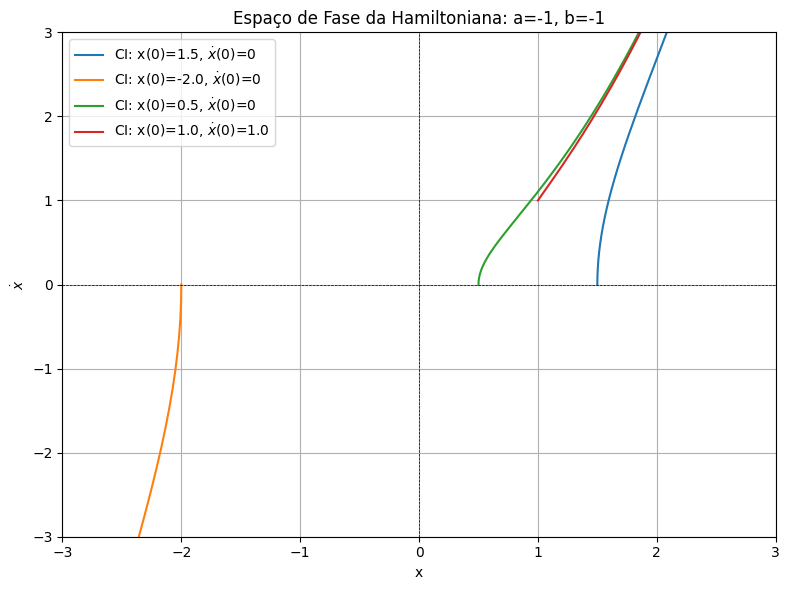

In [13]:
# Geração dos gráficos
for title, (a, b) in parameter_variations.items():
    plt.figure(figsize=(8, 6))
    
    for y0 in initial_conditions:
        solution = rk4(model, y0, t_span, a, b)
        x_values = solution[:, 0]
        x_dot_values = solution[:, 1]
        
        # Plota a trajetória no espaço de fase
        plt.plot(x_values, x_dot_values, label=f'CI: x(0)={y0[0]}, $\dot{{x}}$(0)={y0[1]}')
    
    plt.title(f'Espaço de Fase da Hamiltoniana: {title}')
    plt.xlabel('x')
    plt.xlim(-3,3)
    plt.ylabel('$\dot{x}$')
    plt.ylim(-3,3)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
plt.ylim?

Signature: plt.ylim(*args, **kwargs) -> 'tuple[float, float]'
Docstring:
Get or set the y-limits of the current Axes.

Call signatures::

    bottom, top = ylim()  # return the current ylim
    ylim((bottom, top))   # set the ylim to bottom, top
    ylim(bottom, top)     # set the ylim to bottom, top

If you do not specify args, you can alternatively pass *bottom* or
*top* as kwargs, i.e.::

    ylim(top=3)  # adjust the top leaving bottom unchanged
    ylim(bottom=1)  # adjust the bottom leaving top unchanged

Setting limits turns autoscaling off for the y-axis.

Returns
-------
bottom, top
    A tuple of the new y-axis limits.

Notes
-----
Calling this function with no arguments (e.g. ``ylim()``) is the pyplot
equivalent of calling `~.Axes.get_ylim` on the current Axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_ylim` on the current Axes. All arguments are passed though.
File:      ~/mydsenv/lib/python3.12/site-packages/matplotlib/pyplot.py
T